In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import random

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn import preprocessing, svm
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
cdf = pd.read_csv('ddf_final_without_scores.csv')
cdf = cdf[['result', 'diff', 'color', 'game_time', 'elo', 
           'opp_elo', 'start_time', 'weekday', 'day']]
#cdf = cdf[cdf['result']!=0.5]

In [17]:
X = np.array(cdf.drop(['result'],1))
y = np.array(cdf['result'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
# Fit your model using the training set
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = knr.predict(X_train)
test_predicted = knr.predict(X_test)

In [21]:
def rmse(predictions, targets):

    differences = predictions - targets            
    differences_squared = differences ** 2                   
    mean_of_differences_squared = differences_squared.mean()  
    rmse_val = np.sqrt(mean_of_differences_squared)           
    return rmse_val

rmse(y_train, train_predicted)

0.4026735870393228

In [24]:
mean_squared_error(y_train, train_predicted)**.5

0.4026735870393228

In [25]:
training_rmse = rmse(y_train, train_predicted)
testing_rmse = rmse(y_test, test_predicted)

print(training_rmse, testing_rmse)

0.4026735870393228 0.4947405501073566


In [26]:
def crossVal(X_train, y_train, k=5):
    kf = KFold(n_splits=k)
    splits = kf.split(X_train, y_train)
    split_rmse = []
    
    for train_index, test_index in splits:

        fold_training_X = X_train[train_index]
        fold_training_Y = y_train[train_index]
        fold_testing_X = X_train[test_index]
        fold_testing_Y = y_train[test_index]
        
        knr = KNeighborsRegressor()
        knr.fit(fold_training_X, fold_training_Y)
        predictions = knr.predict(fold_testing_X)
        
        split_rmse.append(rmse(predictions, fold_testing_Y))
    
    return np.mean(split_rmse)
    
crossVal(X_train, y_train)

0.5006566457105193

In [31]:
output = []
sizes = []
for size in [.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .60, .65, .70, .75, .8, .85, .9, .95, 1]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    output.append(crossVal(X_train, y_train))
    sizes.append(size)

remse_values = list(zip(sizes, output))

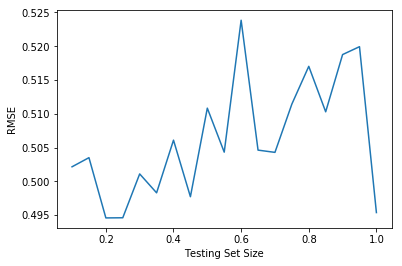

In [32]:
plt.plot(sizes, output)
plt.xlabel('Testing Set Size')
plt.ylabel('RMSE')
plt.show()

In [33]:
def crossVal(X_train, y_train):
    knr = KNeighborsRegressor()
    knr.fit(X_train, y_train)
    train_predicted = knr.predict(X_train)
    test_predicted = knr.predict(X_test)

In [35]:
kf = KFold(n_splits=4, random_state=1, shuffle=True)

In [38]:
rmse = []
for train_index, test_index in kf.split(X):
    print("TRAIN:0l", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rmse.append(sqrt(mean_squared_error(X_test, X_train)))
return rmse

TRAIN:0l [   1    2    4 ... 1805 1807 1808] TEST: [   0    3    8   19   22   30   37   39   40   47   48   49   51   53
   56   58   60   65   75   80   81   82   91   94   98  101  102  104
  107  108  111  115  119  120  126  133  140  158  161  167  169  177
  181  186  190  194  201  202  204  208  223  227  228  231  236  241
  248  255  258  259  264  267  268  270  275  281  282  283  285  286
  288  292  293  297  299  301  302  303  304  305  309  325  330  331
  335  336  341  348  351  361  366  368  372  375  382  385  386  389
  396  400  403  406  408  418  421  424  428  432  434  435  442  446
  447  453  462  464  478  480  486  507  510  512  525  527  528  531
  534  535  536  546  553  555  556  563  571  573  577  587  592  593
  596  598  599  602  607  612  613  619  620  622  631  632  634  640
  643  644  649  650  653  654  655  659  664  669  671  672  674  679
  683  693  697  698  700  702  703  708  713  718  725  729  733  736
  737  745  750  759  764 

ValueError: Found input variables with inconsistent numbers of samples: [453, 1356]

In [360]:
X = preprocessing.scale(X)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [362]:
clf = LinearRegression(n_jobs=4)
#clf = svm.SVR(kernel='poly')
#clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [363]:
accuracy = clf.score(X_test, y_test)
accuracy

0.1446356706111247

In [365]:
forecast_set = clf.predict(X_test)

In [366]:
forecast_set

array([ 0.65256515,  0.45079628,  0.45251988,  0.49043919,  0.33631725,
        0.51812399,  0.39736453,  0.45196215,  0.5250184 ,  0.14165704,
        0.5662778 ,  0.48699198,  0.42494221, -0.08241158,  0.48871558,
        0.46286151,  0.52835849,  0.52835849,  0.60947503,  0.51122957,
        0.20359968,  0.69048446,  0.65773597,  0.50422803,  0.49561   ,
        0.71116771,  0.58968714,  0.54387093,  0.421495  ,  0.42083015,
        0.46458512,  0.40253535,  0.31301502,  0.46813945,  0.45596709,
        0.47158666,  0.43989692,  0.43366735,  0.76104513,  0.38702291,
        0.48009756,  0.62326387,  0.46286151,  0.35366041,  0.49571712,
        0.54397806,  0.70254969,  0.46986305,  0.51295317,  0.35772163,
        0.5594905 ,  0.53708364,  0.66118318,  0.45524597,  0.41632419,
        0.34159518,  0.61464585,  0.60247349,  0.63015829,  0.38630178,
        0.63116077,  0.53536003,  0.45952143,  0.45424349,  0.50695411,
        0.50022309,  0.57845015,  0.55938338,  0.24334971,  0.54